In [1]:
import time
import shap
import optuna 

import numpy as np
import pandas as pd

from tqdm.notebook import tqdm 

import seaborn as sns
sns.set(style='ticks')
sns.set_palette(sns.color_palette('husl', 8))

import matplotlib.pyplot as plt
%matplotlib inline

params = {
    'legend.fontsize': 'x-large',
    'figure.figsize': (16, 5),
    'axes.labelsize': 'x-large',
    'axes.titlesize':'x-large',
    'xtick.labelsize':'x-large',
    'ytick.labelsize':'x-large',
}
plt.rcParams.update(params)

from src.data_visualization import visualize_correlation

from IPython.display import display, HTML
display(HTML("<style>.container { width:85% !important; }</style>"))

%load_ext autoreload
%autoreload 2

In [2]:
pd.set_option('display.max_columns', None)

In [3]:
# 1. Load processed axis datasets
data = pd.concat(
    [
        pd.read_pickle("data/processed/fe_validation_axis.pkl"),
        pd.read_pickle("data/processed/fe_test_axis.pkl"),        
    ], 
    ignore_index=True
)

# Replace terms for clarification
data.columns = data.columns.str.replace('xfmr', 'sentence')


# 2. Non-features and non-metrics definition
non_columns = [
    "worker",
    "batch",
    "split",
    "id",
    "source",
    "subsource",
    "title",
    "text",
    "summary",
    "policy",
    "note",
    "confidence",
    "ref_summary",
    "compatible",
]

non_metrics = [
    "m_flesch_reading_ease",
    "m_syllable_count",
    "m_lexicon_count",
    "m_sentence_count",
    "m_char_count",
    "m_letter_count",
    "m_polysyllab_count",
    "m_monosyllab_count",
    "m_compression_ratio",
]

# 3. Target
targets = ["accuracy", "coverage", "coherence", "overall"]

# 4. DataFrames
df_targets = data.loc[:, data.columns.isin(targets)]
df_features = data.loc[:, ~data.columns.isin(non_columns + non_metrics + targets)]

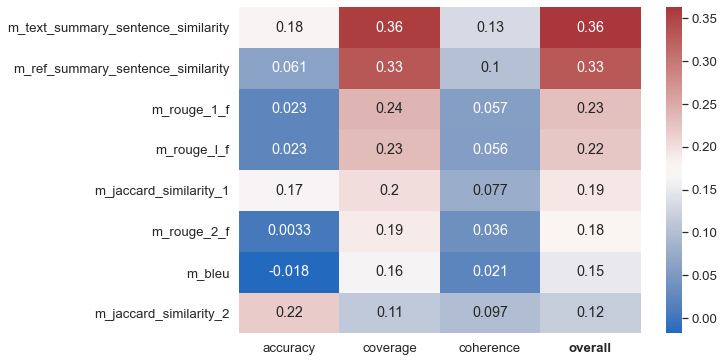

In [9]:
# Plot Heatmap of Target-Feature Correlation
visualize_correlation(
    df_features, 
    df_targets, 
    "overall", 
    None, 
    "figs/axis_metrics_corr",
)